# 线性回归策略
*用线性回归交易*

## 目录

- 什么是线性回归?
- Slope和intercept是什么?
- Confidence Band是怎么算的？
- 如何用线性回归做策略?

## 什么是线性回归?
在统计学中，线性回归(Linear Regression)是利用称为线性回归方程的最小平方函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。

## Slope和intercept是什么?
$y = kx+b$

其中k是slope,而b是intercept

## Confidence Band是怎么算的？
一般是Y加减两个标准差的值

## 如何用线性回归做策略?
1. Buy: 价格大于预测值
2. Buy: 价格大于上方边界
3. Buy: Slope>0
4. Buy: 残差变化率的均线上涨

In [2]:
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib as ta
from talib import abstract

warnings.filterwarnings('ignore')
# data = pd.Panel({s: pd.read_excel('threesymbol.xlsx', sheetname=s, index_col='datetime') 
#                    for s in ['BTCUSDT.binance', 'EOSUSDT.binance', 'ETHUSDT.binance']})
data = pd.read_excel('three.xlsx', sheetname='BTCUSDT.binance', index_col='datetime')

In [19]:
slope = abstract.LINEARREG_SLOPE(data, 60, price='close').iloc[-300:]
prediction = abstract.LINEARREG(data, 60, price='close').iloc[-300:]
band = 2*abstract.STDDEV(data, 60, price='close').iloc[-300:]

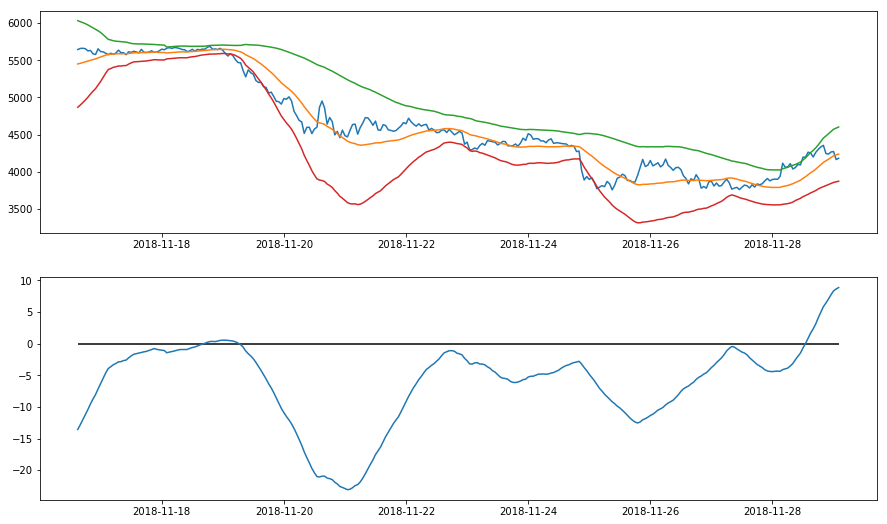

In [21]:
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
plt.plot(data['close'].iloc[-300:])
plt.plot(prediction)
plt.plot(prediction+band)
plt.plot(prediction-band)
plt.subplot(2,1,2)
plt.hlines(y=0,xmax=slope.index[-1],xmin=slope.index[0])
plt.plot(slope)
plt.show()

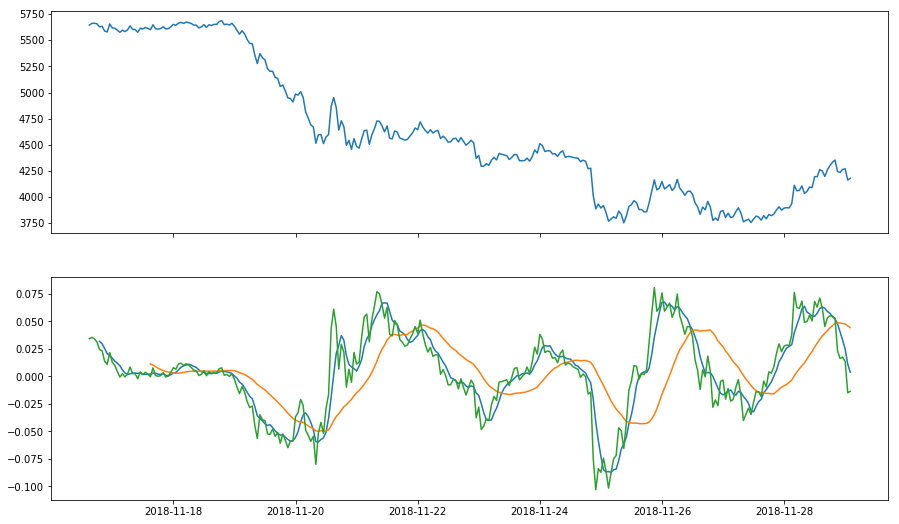

In [22]:
# 残差
residual = ((data['close']-prediction)/data['close']).iloc[-300:]
smaR = pd.Series(ta.MA(residual.values, 5),index=residual.index).iloc[-300:]
lmaR = pd.Series(ta.MA(residual.values, 25),index=residual.index).iloc[-300:]

f,(a1,a2)=plt.subplots(2,1,sharex=True,figsize=(15,9))
a1.plot(data['close'].iloc[-300:])
a2.plot(smaR)
a2.plot(lmaR)
a2.plot(residual)
plt.show()

In [ ]:
# 参数设置
regPeriod = 40
residualSmaPeriod = 12; residualLmaPeriod = 30

# 指标计算
prediction = ta.LINEARREG(am.close, self.regPeriod)
residual = (am.close - prediction) / am.close
residualSma = ta.MA(residual, self.residualSmaPeriod)
residualLma = ta.MA(residual, self.residualLmaPeriod) 

# 现象条件
residualUp = residualSma[-1] > residualLma[-1]
residualDn = residualSma[-1] < residualLma[-1]

# 进出场条件
if residualUp  and (self.posDict[symbol + "_LONG"]==0):
    if self.posDict[symbol + "_SHORT"] == 0:
        self.buy(symbol, bar.close * 1.01, self.lot)
    elif self.posDict[symbol + "_SHORT"] > 0:
        self.cover(symbol, bar.close * 1.02, self.posDict[symbol + "_SHORT"])
        self.buy(symbol, bar.close * 1.01, self.lot)

elif residualDnand (self.posDict[symbol + "_SHORT"]==0):
    if self.posDict[symbol + "_LONG"] == 0:
        self.short(symbol, bar.close * 0.99, self.lot)
    elif self.posDict[symbol + "_LONG"] > 0:
        self.sell(symbol, bar.close * 0.99, self.posDict[symbol + "_LONG"])
        self.short(symbol, bar.close *0.99, self.lot)